# Testing Plotter and DataFrameTransform Classes:

### Import dataframe, relevant classes and librares to transform the original loan_payments_data dataframe

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from DataFrameInfo import DataFrameInfo
from DataTransform import DataTransform
from DataFrameTransform import DataFrameTransform
from Plotter import Plotter



transformed_df = pd.read_csv("loan_payments_data.csv")
transformer = DataTransform(transformed_df)
excess_symbol_columns = ['term']

for column in excess_symbol_columns:
    transformer.remove_excess_symbols(column)


date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

for column in date_columns:
    transformer.convert_to_datetime(column)


numeric_columns = ['term']

for column in numeric_columns:
    transformer.convert_to_numeric(column)

categorical_columns = ['home_ownership', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', 'policy_code', 'application_type','employment_length']

for column in categorical_columns:
    transformer.convert_to_categorical(column)

category_to_numeric_columns = ['employment_length']

for column in category_to_numeric_columns:
    transformer.convert_categorical_to_numeric(column)

# df we are apply new transformations to:
transformed_df_copy = transformed_df.copy()

### Null Values:

In [49]:
df_info = DataFrameInfo(transformed_df_copy)

print("\nNull Values Information:")
print( df_info.count_null_values())


Null Values Information:
                             Null Count  Percentage Null
id                                    0         0.000000
member_id                             0         0.000000
loan_amount                           0         0.000000
funded_amount                      3007         5.544799
funded_amount_inv                     0         0.000000
term                               4772         8.799395
int_rate                           5169         9.531449
instalment                            0         0.000000
grade                                 0         0.000000
sub_grade                             0         0.000000
employment_length                  2118         3.905515
home_ownership                        0         0.000000
annual_inc                            0         0.000000
verification_status                   0         0.000000
issue_date                            0         0.000000
loan_status                           0         0.000000
payme

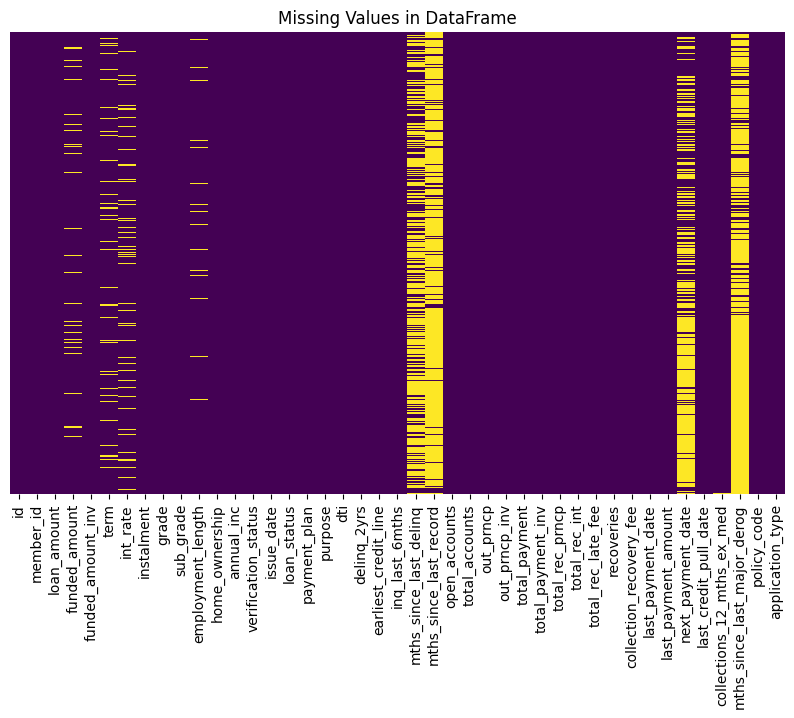

In [50]:
Plotter.plot_nulls(transformed_df_copy)

In [51]:
columns_with_null_values = Plotter.columns_with_nulls(transformed_df_copy)

if not columns_with_null_values.empty:
    print(f"Columns with null values: {columns_with_null_values}")
else:
    print("No columns have null values.")

Columns with null values: Index(['funded_amount', 'term', 'int_rate', 'employment_length',
       'mths_since_last_delinq', 'mths_since_last_record', 'last_payment_date',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog'],
      dtype='object')


In [52]:
Plotter.nulls_above_50_percent(transformed_df_copy)

Columns with more than 50% null values: Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date',
       'mths_since_last_major_derog'],
      dtype='object')


#### Dropping Null Values:

In [53]:
transformed_df_copy = DataFrameTransform.drop_columns(transformed_df_copy, threshold=50)

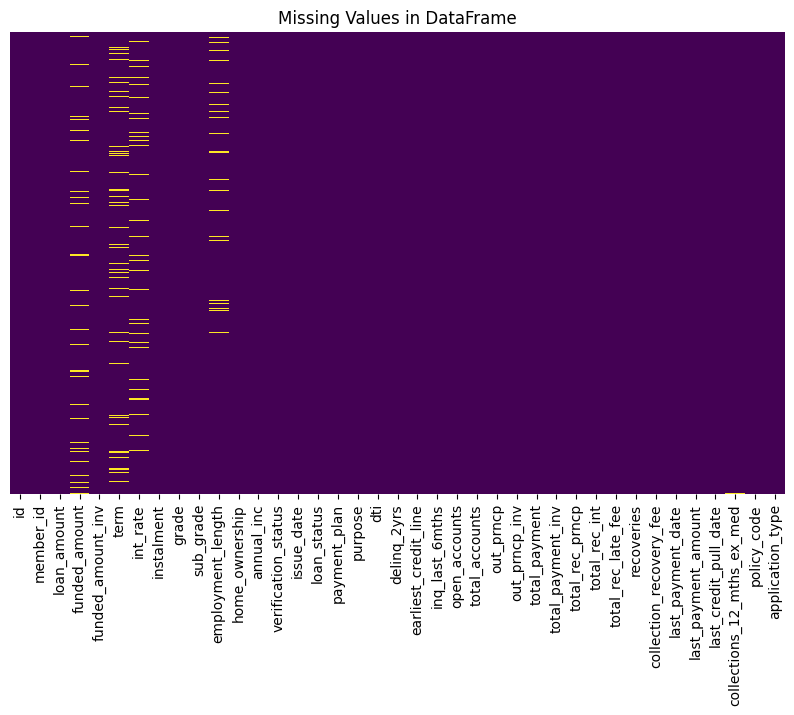

In [54]:
# Look at data now columns have been dropped:
Plotter.plot_nulls(transformed_df_copy)

#### Imputing Null Values:

In [55]:
# Impute specific columns with mean
columns_to_impute_mean = ['funded_amount', 'term', 'int_rate']
transformed_df_copy = DataFrameTransform.impute_mean(transformed_df_copy, columns=columns_to_impute_mean)

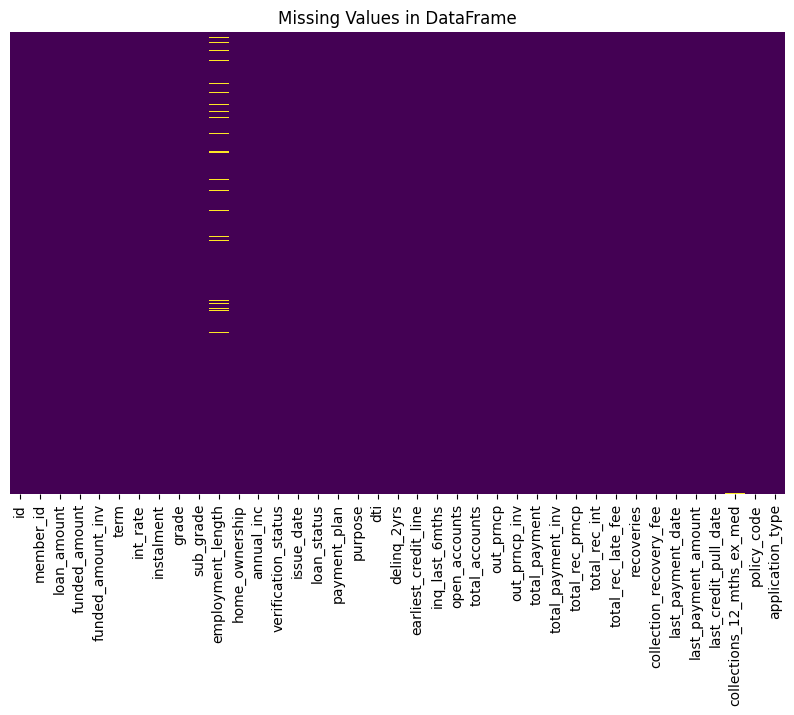

In [56]:
Plotter.plot_nulls(transformed_df_copy)

In [57]:
categorical_columns_to_impute_mode = ['employment_length']
transformed_df_copy = DataFrameTransform.impute_mode(transformed_df_copy, columns=categorical_columns_to_impute_mode)

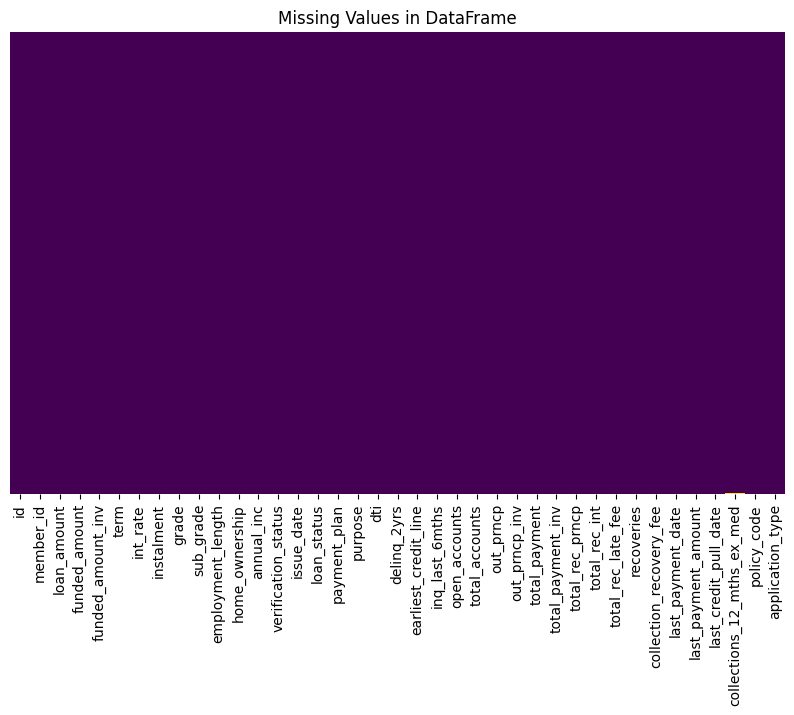

In [58]:
#After imputation:
Plotter.plot_nulls(transformed_df_copy)

## Skewed Data:

In [59]:
original_skewed_columns = Plotter.identify_skewed_columns(transformed_df)
print("Skewed Columns:", original_skewed_columns)

Skewed Columns: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


In [60]:
skewed_columns = Plotter.identify_skewed_columns(transformed_df_copy)
print("Skewed Columns:", skewed_columns)

Skewed Columns: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'instalment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'collections_12_mths_ex_med']


#### Transforming Skewed Data:

In [61]:
transformed_df_copy = Plotter.apply_best_transformation(transformed_df_copy, skewed_columns)

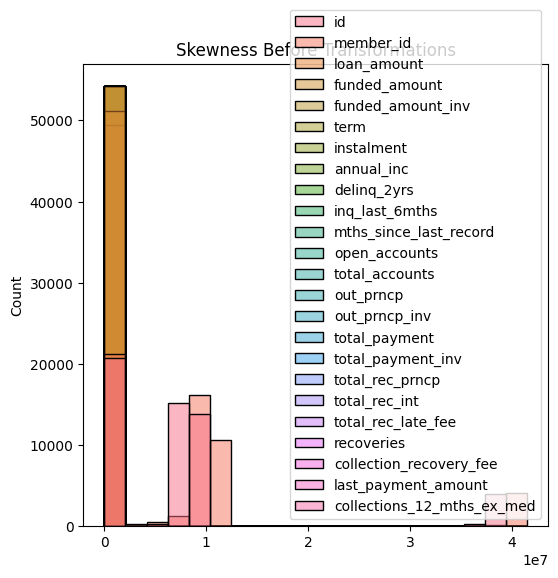

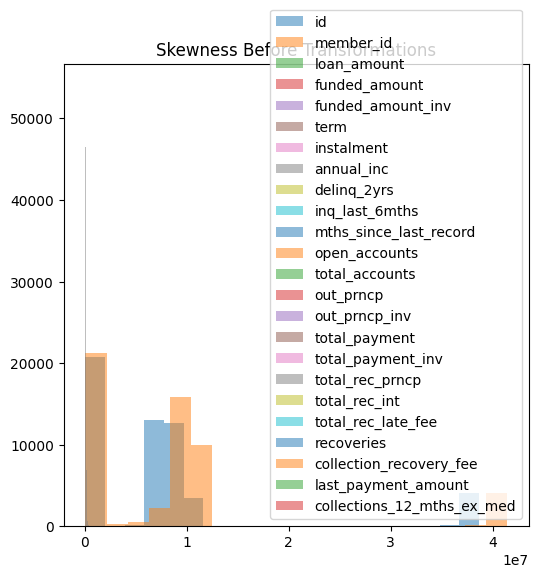

In [62]:
Plotter.visualise_original_skewness(transformed_df, original_skewed_columns)
Plotter.visualise_original_skewness_histogram(transformed_df, original_skewed_columns)

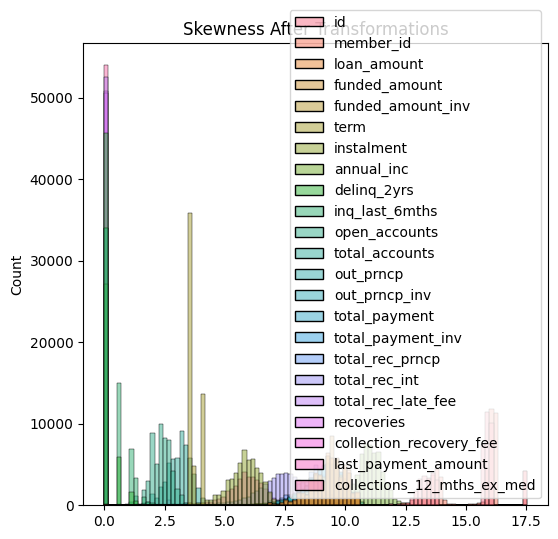

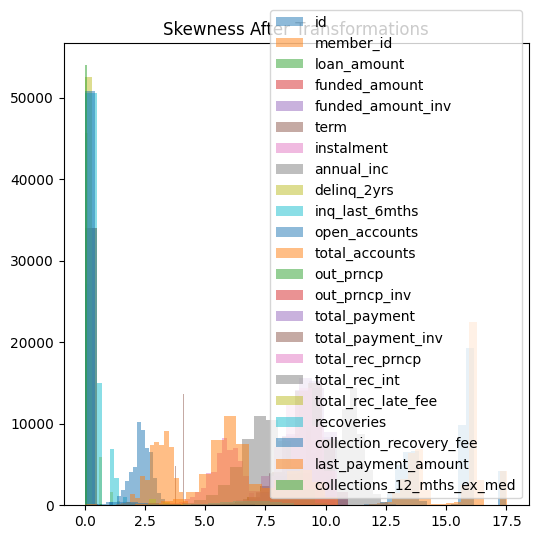

In [63]:
Plotter.visualise_transformed_skewness(transformed_df_copy, skewed_columns)
Plotter.visualise_transformed_skewness_histogram(transformed_df_copy, skewed_columns)

### Outliers:

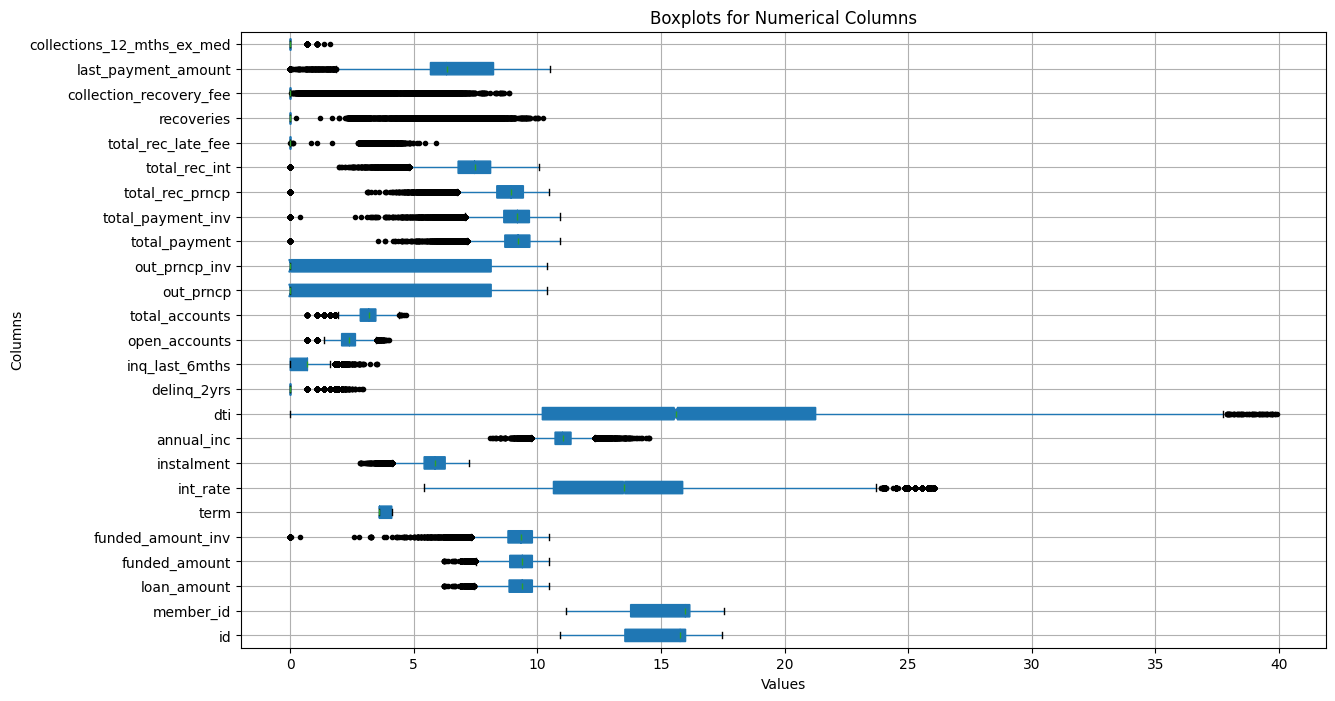

In [64]:
Plotter.visualise_boxplots(transformed_df_copy)

#### Transforming Outlier data:

In [65]:
outlier_columns = ['collections_12_mths_ex_med', 'last_payment_amount', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int', 'total_rec_prncp', 'total_payment_inv', 'total_payment', 'total_accounts', 'open_accounts', 'inq_last_6mths', 'delinq_2yrs', 'dti', 'annual_inc', 'instalment', 'int_rate', 'funded_amount_inv', 'funded_amount', 'loan_amount']
transformed_df_copy = DataFrameTransform.remove_outliers(transformed_df_copy, outlier_columns)

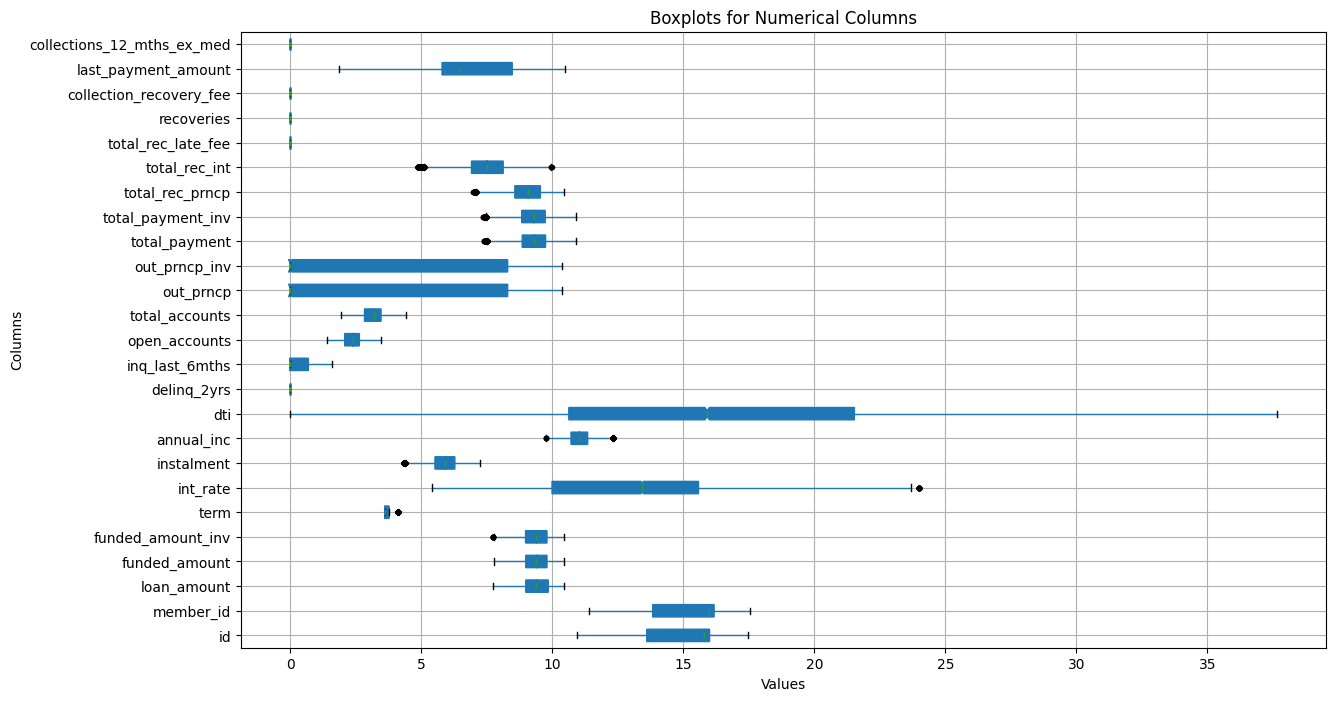

In [66]:
Plotter.visualise_boxplots(transformed_df_copy)

### Correlated Data:

#### View the correlation of the Data:

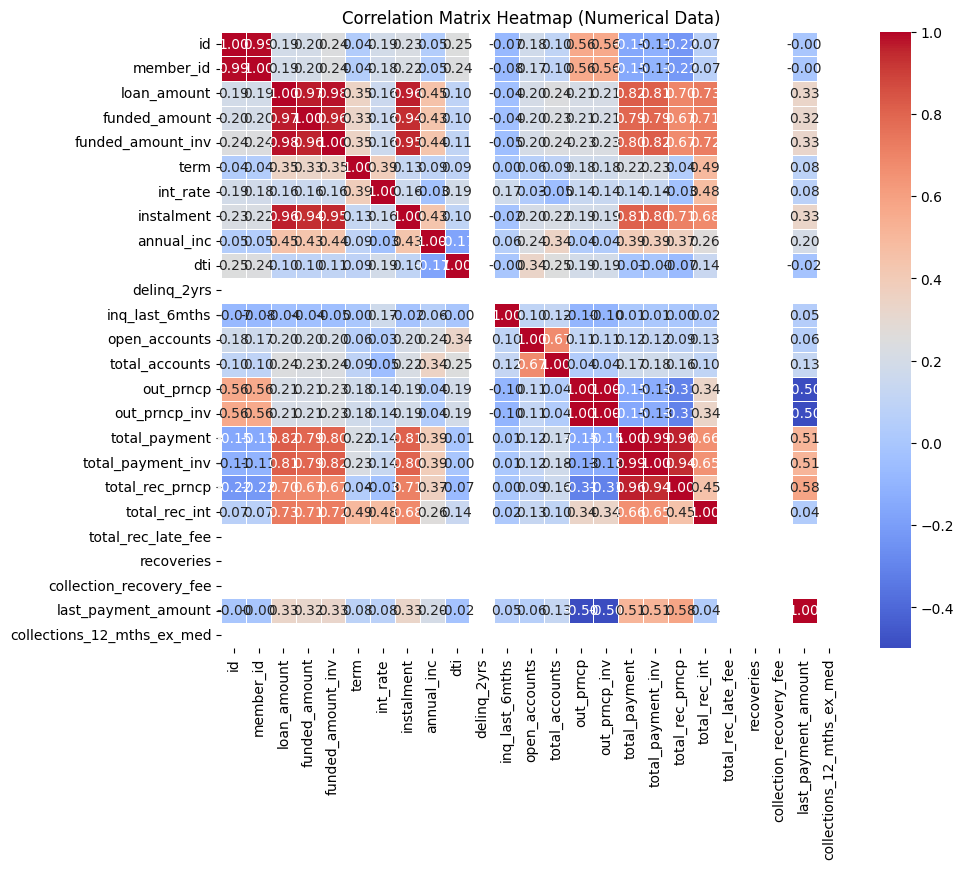

In [67]:
numerical_columns = transformed_df_copy.select_dtypes(include=['number']).columns
correlation_matrix = transformed_df_copy[numerical_columns].corr()
Plotter.visualise_heatmap(correlation_matrix)

In [68]:
highly_correlated_columns = DataFrameTransform.identify_highly_correlated_columns(transformed_df_copy, threshold=0.8)
print(f"Highly correlated column pairs: {highly_correlated_columns}")

Highly correlated column pairs: [('id', 'member_id'), ('loan_amount', 'funded_amount'), ('loan_amount', 'funded_amount_inv'), ('loan_amount', 'instalment'), ('loan_amount', 'total_payment'), ('loan_amount', 'total_payment_inv'), ('funded_amount', 'funded_amount_inv'), ('funded_amount', 'instalment'), ('funded_amount_inv', 'instalment'), ('funded_amount_inv', 'total_payment_inv'), ('instalment', 'total_payment'), ('instalment', 'total_payment_inv'), ('out_prncp', 'out_prncp_inv'), ('total_payment', 'total_payment_inv'), ('total_payment', 'total_rec_prncp'), ('total_payment_inv', 'total_rec_prncp')]


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


#### Tranform Highly Correlated Data:

Original Columns: Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'term', 'int_rate', 'instalment', 'grade', 'sub_grade',
       'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type'],
      dtype='object')
Columns after Removal: Index(['id', 'loan_amount', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp

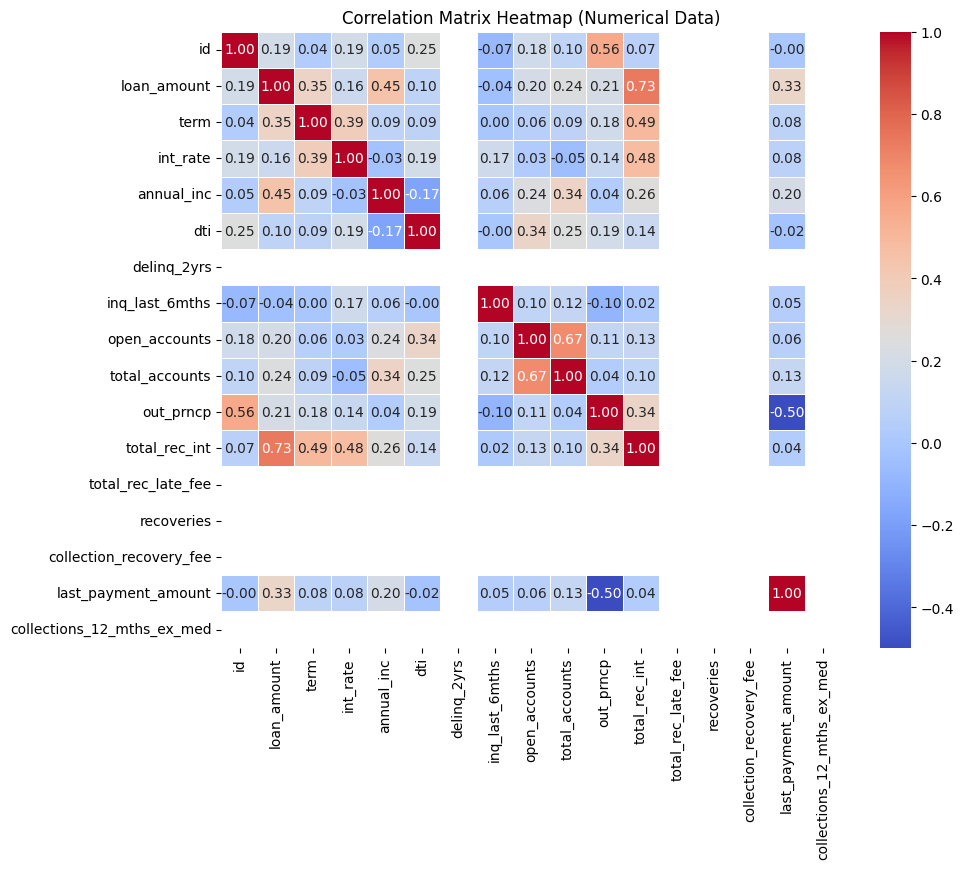

In [69]:
transformed_df_copy = DataFrameTransform.remove_highly_correlated_columns(transformed_df_copy, highly_correlated_columns)

print("Original Columns:", transformed_df.columns)
print("Columns after Removal:", transformed_df_copy.columns)


numerical_columns = transformed_df_copy.select_dtypes(include=['number']).columns
correlation_matrix = transformed_df_copy[numerical_columns].corr()
Plotter.visualise_heatmap(correlation_matrix)